# Name: Sparsh Karna
# Registration Number: 23BDS1172

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [2]:
df = pd.read_csv("energy-cool.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [3]:
df.shape

(768, 9)

In [4]:
print(df.isna().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y2    0
dtype: int64


In [5]:
x = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = df['Y2']
print(x.shape)
print(y.shape)


(768, 8)
(768,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [7]:
knn_acc = []
knn_values = range(1, 13)

for k in knn_values:
    knnreg = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    score = cross_val_score(knnreg, x_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    knn_acc.append(-score.mean())

In [8]:
best_k=knn_values[np.argmin(knn_acc)]
best_k

7

In [9]:
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=7)

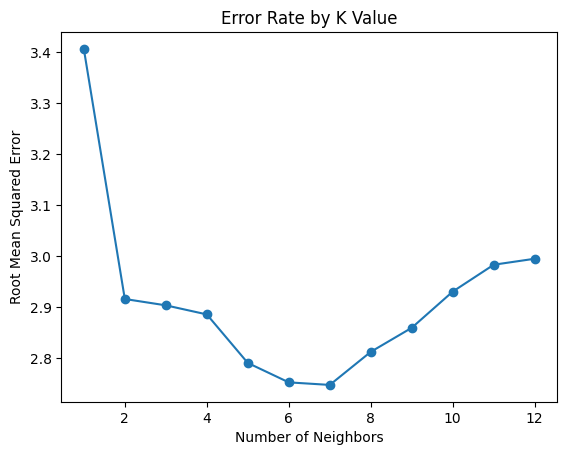

In [10]:
plt.plot(knn_values, knn_acc, marker='o')
plt.xlabel("Number of Neighbors")
plt.ylabel("Root Mean Squared Error")
plt.title("Error Rate by K Value")
plt.show()

In [11]:
y_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 2.2014899459579413
R2 Score: 0.9486764601283688


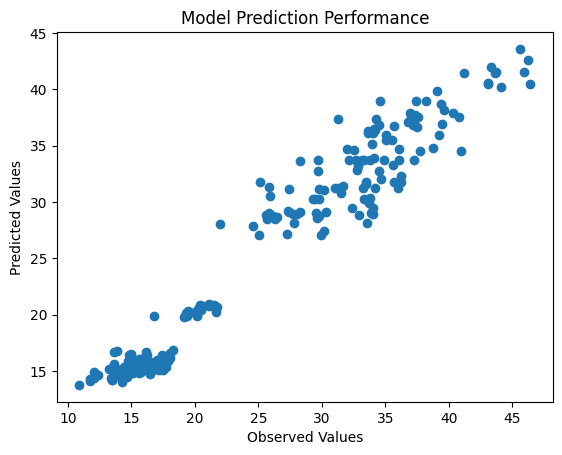

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Model Prediction Performance")
plt.show()

In [13]:
train_data = pd.read_csv("politifakenews/train.csv")
test_data = pd.read_csv("politifakenews/test.csv")

train_data.head()


,Unnamed: 0,news,label
0,0,“Pennsylvania is under a court order to count ...,0
1,1,“Biden and Democrats have dismantled border se...,0
2,2,Katie Hobbs “has voted to double our gas tax. ...,1
3,3,Reuters reported that Nancy Pelosi bought 10 m...,0
4,4,"It's not true that ""the United States was buil...",0


In [14]:
print(train_data.columns)
print(test_data.columns)


Index(['Unnamed: 0', 'news', 'label'], dtype='object')
Index(['Unnamed: 0', 'news', 'label'], dtype='object')


In [15]:
X_train = train_data["news"]
y_train = train_data["label"]

X_test = test_data["news"]
y_test = test_data["label"]


In [16]:
vectorizer = CountVectorizer(binary=True, stop_words="english")

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
model = BernoulliNB()
model.fit(X_train_vec, y_train)

BernoulliNB()

In [18]:
train_pred = model.predict(X_train_vec)
test_pred = model.predict(X_test_vec)


In [19]:
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_pred))

Training Accuracy: 0.7933879461673493
Testing Accuracy: 0.7367549668874173

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      2399
           1       0.66      0.82      0.73      1829

    accuracy                           0.74      4228
   macro avg       0.74      0.75      0.74      4228
weighted avg       0.76      0.74      0.74      4228



In [20]:
cm = confusion_matrix(y_test, test_pred)
cm

array([[1609,  790],
       [ 323, 1506]])

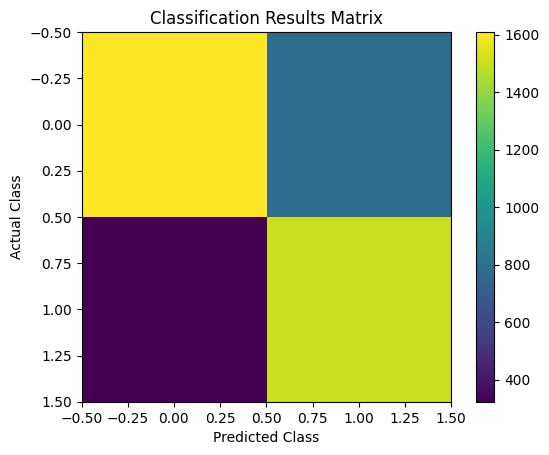

In [21]:
plt.imshow(cm)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Classification Results Matrix")
plt.show()

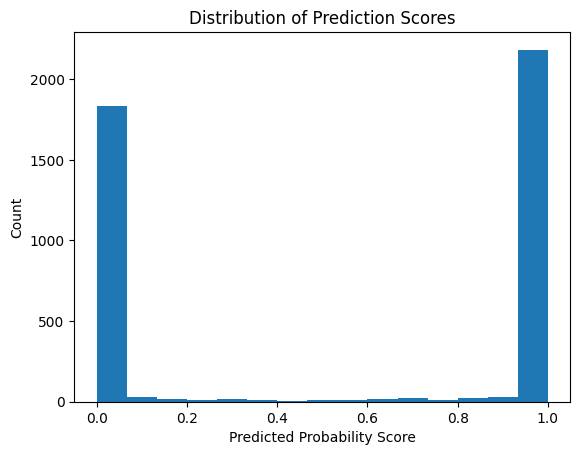

In [22]:
probs = model.predict_proba(X_test_vec)

plt.hist(probs[:, 1], bins=15)
plt.xlabel("Predicted Probability Score")
plt.ylabel("Count")
plt.title("Distribution of Prediction Scores")
plt.show()